In [ ]:
import torch
from torch import nn # nn contains all building blocks for building neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

Use Linear Regression to make a straight line from *know* parameters

In [ ]:
# Create *know* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and testing sets

Let's create a training and test

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
def plot_prediction(train_data=X_train, train_label=y_train,
                    test_data=X_test, test_label=y_test,
                    predictions=None):
  """
  Plots training data, test, and compares predictions.
  """
  plt.figure(figsize=(5, 4))
  plt.scatter(train_data, train_label,
              c='b',
              s=4,
              label='Training data')

  plt.scatter(test_data, test_label,
              c='r',
              s=4,
              label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions,
                c='y',
                s=4,
                label='Predictions')

  plt.legend(prop={'size': 14})

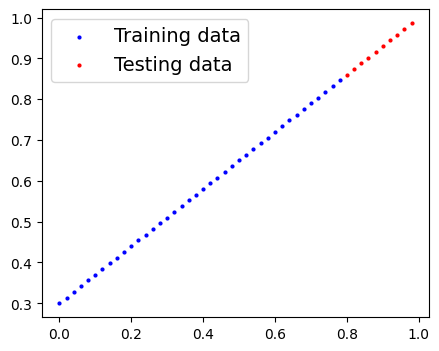

In [ ]:
plot_prediction()

## 2. Build Model

Our first PyTorch model!

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through 2 main algorithms:
1. Gradient Descent
2. Backpropagation

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True, # Can this parameter be updated via gradient descent # PyTorch will track the gradient of this parameter
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### PyTorch model building essentials

* torch.nn - Contains all of the buildings for computational graphs (a neural network can be considered a computational graphs)
* torch.nn.Parameter - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - Base class for all neural network modules, if you subclasses, you should override forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with **gradient descent**
* def forward() - All nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation.

## Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside

So we can check our model parameters or what's inside our model using .parameters

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts based `y_test` based on X_test

In [ ]:
torch.hstack([X_test, y_test])

tensor([[0.8000, 0.8600],
        [0.8200, 0.8740],
        [0.8400, 0.8880],
        [0.8600, 0.9020],
        [0.8800, 0.9160],
        [0.9000, 0.9300],
        [0.9200, 0.9440],
        [0.9400, 0.9580],
        [0.9600, 0.9720],
        [0.9800, 0.9860]])

In [ ]:
model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

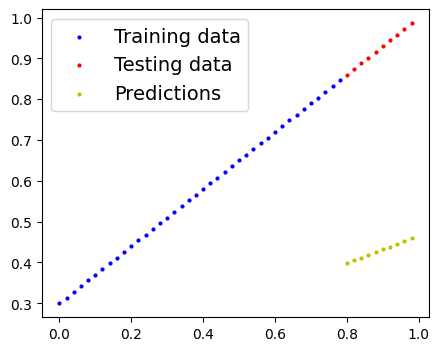

In [ ]:
plot_prediction(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function**: A function to measure how wrong your model's predictions are to ideal predictions, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01)

In [ ]:
torch.mean(torch.abs(y_preds - y_test))

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### Building a training **loop** and a testing **loop** in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - Move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01)

In [ ]:
# An epoch is one loop through the data...
epochs = 100

# Tracking training
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode # default is training mode
  model_0.train() # train mode in PyTorch sets all parameters that require

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # this loss on variable that require gradients

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward() # Compute gradients on the loss function of every parameter with requires_grad = True

  # 5. Step the optimizer (Gradient descent)
  optimizer.step() # by default how the optimizer changes will accummulate through the loop
                   # so... we have to zero them above in step 3 for the next iteration of the loop.
                   # Update the model parameters wrt the gradients calculated by loss.backward()

  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layer).
  with torch.inference_mode(): # turn off gradient tracking in the model not needed for evaluation.
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach())
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819


Text(0, 0.5, 'Loss')

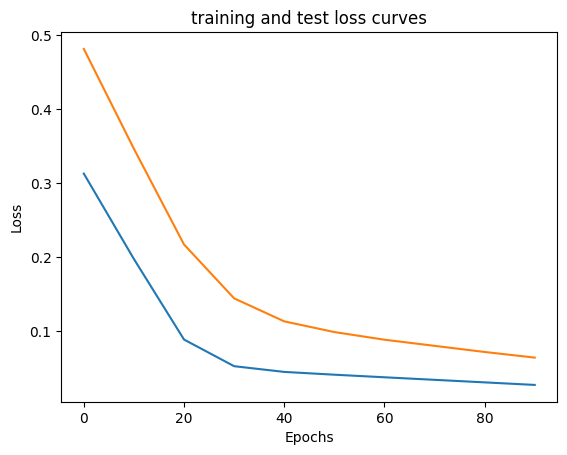

In [ ]:
plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('training and test loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

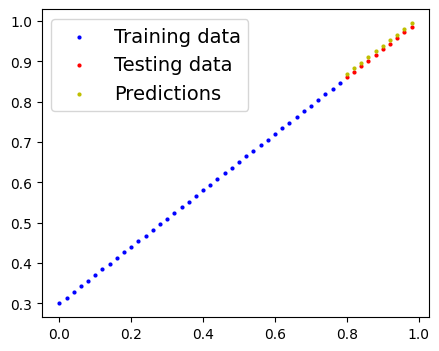

In [ ]:
with torch.inference_mode():
  plot_prediction(predictions=model_0(X_test))

## Saving a model in PyTorch

There are 3 main methods about saving and loading models in PyTorch

1. `torch.save()` - allows you to save PyTorch object in Python's pickle format.

2. `torch.load()` - allows you to load a saved PyTorch object.

3. `torch.nn.Module.load_state_dict()` - load model's saved state dictionary.

In [ ]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth' # .pth = .pt = PyTorch object / PyTorch model
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save model's state dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [ ]:
model = LinearRegressionModel()
model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model.val()
with torch.inference_mode():
  pred = model(X_test)

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(1)
y = X * weight + bias

nTrain = int(0.8 * len(X))

X_train, y_train = X[:nTrain], y[:nTrain]
X_test, y_test = X[nTrain:], y[nTrain:]

In [4]:
class LRModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

In [6]:
epochs = 100
epoch_l = []
train_l = []
test_l = []

torch.manual_seed(42)

model = LRModel()
loss_func = nn.L1Loss()
optimizerSGD = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [10]:
print(model.parameters())
next(model.parameters())

<generator object Module.parameters at 0x7ceb55595230>


Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [7]:
model.parameters(), next(model.parameters()).device

(<generator object Module.parameters at 0x7ceb556f7a00>, device(type='cpu'))

In [11]:
for epoch in range(epochs):
  model.train()
  preds = model(X_train)
  loss_train = loss_func(preds, y_train)

  optimizerSGD.zero_grad()

  loss_train.backward()

  optimizerSGD.step()

  model.eval()
  with torch.inference_mode():
    preds = model(X_test)
    loss_test = loss_func(preds, y_test)

  if epoch % 10 == 0:
    print(f'Epoch {epoch} | Loss: {loss_train} | Test Loss: {loss_test}')
    test_l.append(loss_test)
    train_l.append(loss_train.detach())
    epoch_l.append(epoch)

Epoch 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703


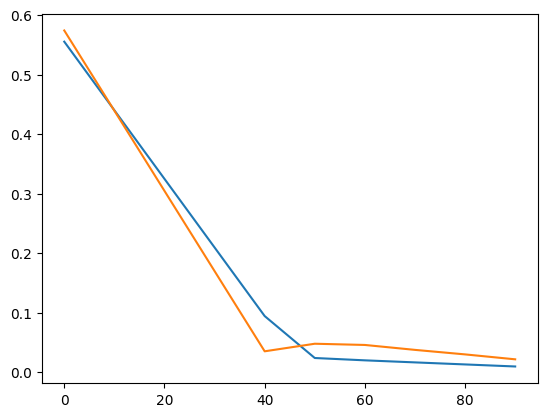

In [12]:
plt.plot(epoch_l, train_l, label='traing')
plt.plot(epoch_l, test_l, label='test')

In [15]:
from pathlib import Path

MODEL_DIR = Path('models')
MODEL_DIR.mkdir(parents=True, exist_ok=True)
FILE_NAME = 'LR.pth'

FILE_PATH = MODEL_DIR / FILE_NAME

torch.save(model.state_dict(), FILE_PATH)